

---



---


#Linear Reggression


---



---
*Linear regression* models the relationship between independent variable(s) x and dependent variable y using a linear equation:

$$
y = β₀ + β₁x + ε
$$

where:
- β₀ is the y-intercept,
- β₁ is the slope,
- x is the independent variable,
- y is the dependent variable, and
- ε is the error term.


In this notebook, we will explore linear regression by generating synthetic data using `NumPy`. We will create the dataset with the following relationship:
`y = 4 + 3 * x + ε`, where `x` is generated from a uniform distribution and `ε` is added noise.


#Setup

In [1]:
# Common imports
import sklearn
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Establish a fixed random seed for consistent reproducibility in random processes
np.random.seed(42)


# Generate the dataset

In [2]:
# Generating a synthetic dataset for regression analysis

# Step 1: Generating feature matrix X
# X contains 100 samples with 1 feature each
# Values are randomly sampled from a uniform distribution between 0 and 2
X = 2 * np.random.rand(100, 1)

# Step 2: Generating target variable y
# y is generated based on the equation y = 4 + 3*X + noise
# np.random.randn(100, 1) adds random noise sampled from a standard normal distribution (mean 0, std deviation 1)
# The noise introduces variability and makes the relationship between X and y more realistic
y = 4 + 3 * X + np.random.randn(100, 1)


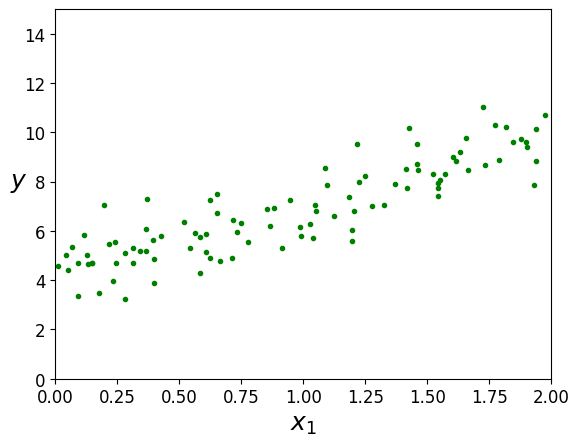

In [3]:
plt.plot(X, y, "g.")             # Plotting X versus y with blue dots
plt.xlabel("$x_1$", fontsize=18)  # Labeling the x-axis with LaTeX notation
plt.ylabel("$y$", rotation=0, fontsize=18)  # Labeling the y-axis with LaTeX notation
plt.axis([0, 2, 0, 15])           # Setting the axis limits: [xmin, xmax, ymin, ymax]
plt.show()                       # Displaying the plot


In [4]:
# New input data for prediction
X_new = np.array([[0], [2]])

# Augmenting the new input data by adding a column of ones to represent x0 = 1 for each instance
# X_new_b = np.c_[np.ones((2, 1)), X_new]


#Split the data into train_test 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Importing and training linear regression model

In [7]:
from sklearn.linear_model import LinearRegression  # Import LinearRegression model from scikit-learn
lin_reg = LinearRegression()  # Instantiate a LinearRegression model

In [8]:
# .fit() method in scikit-learn is used to train a machine learning model on the provided training data.
# Train the LinearRegression model on X_train and y_train
lin_reg.fit(X_train,y_train )

# Intercept (bias) term of the linear regression model
print('Linear Regression Model intercept is', lin_reg.intercept_)

# Coefficients of the features in the linear regression model
print('Linear Regression Model Co-efficient is', lin_reg.coef_)



Linear Regression Model intercept is [4.08033778]
Linear Regression Model Co-efficient is [[2.78523366]]


#Measure Model performance



Mean square error (MSE) is probably the most commonly used error metric. It penalizes larger errors because squaring larger numbers has a greater impact than squaring smaller numbers.  The MSE is the sum of the squared errors divided by the number of observations.

<img src = 'https://miro.medium.com/v2/resize:fit:532/format:webp/1*1TV6T6hNP-iwJrtvfsvCRQ.png'>

The Root Mean Square Error (RMSE) is the square root of the MSE. RMSE is used to convert MSE back into the same units as the actual data.


<img src = 'https://miro.medium.com/v2/resize:fit:640/format:webp/1*usaMSyi6jUT3f2bOMyiYdA.png'>


Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.


<img src = 'https://miro.medium.com/v2/resize:fit:578/format:webp/1*_mx6zD6Qw_1sYEvWszK5Nw.png'>

In [11]:
# Measure Model performance on Train Dataset
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = lin_reg.predict(X_train)


# Measure model performance
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error:", mse)

# Measure model performance
mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error:", mae)

# Measure model performance
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.7072360669081514
Mean Absolute Error: 0.6712316594459017
Root Mean Squared Error: 0.8409732854901821


In [12]:
# Measure Model performance on Test Dataset
y_pred = lin_reg.predict(X_test)


# Measure model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Measure model performance
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Measure model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 1.0870976499013618
Mean Absolute Error: 0.8157319092351295
Root Mean Squared Error: 1.0426397507774974


In [13]:
# Apply model to predict the new test point
lin_reg.predict(X_new)

array([[4.08033778],
       [9.65080511]])